# Lecture 8 - Preprocessing and Cleaning: Missing Data; Outliers; Numerical Normalization

![https://imgs.xkcd.com/comics/every_data_table.png](https://imgs.xkcd.com/comics/every_data_table.png)

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns


# Announcements:


# Goals:
* Be aware of, and get practice deciding how to handle common issues that arise before analysis:
   * Data types and units
   * Missing Data
   * Outliers
* Know how and why to compute a few different numerical normalizations:
  * $z$-scores
  * 0-1 normalization
  * Exponential normalization


# Rule #1 of Data Science: GIGO

> *On two occasions I have been asked, "Pray, Mr. Babbage, if you put into the machine wrong figures, will the right answers come out?" ... I am not able rightly to apprehend the kind of confusion of ideas that could provoke such a question.*
>
> — Charles Babbage, Passages from the Life of a Philosopher

# Data Pitfalls

Here's a "real" dataset that might help us think about issues we may encounter when analyzing data.

In [30]:
df = pd.read_csv("https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_23w/lab2/data/WA_Bellingham.csv", low_memory=False)


In [31]:
df

STATION                 DATE REPORT_TYPE  SOURCE  AWND  \
0      72797624217  2020-01-01T00:14:00       FM-16       7   NaN   
1      72797624217  2020-01-01T00:24:00       FM-16       7   NaN   
2      72797624217  2020-01-01T00:53:00       FM-15       7   NaN   
3      72797624217  2020-01-01T01:53:00       FM-15       7   NaN   
4      72797624217  2020-01-01T02:53:00       FM-15       7   NaN   
...            ...                  ...         ...     ...   ...   
11343  72797624217  2020-12-31T20:53:00       FM-15       4   NaN   
11344  72797624217  2020-12-31T21:53:00       FM-15       4   NaN   
11345  72797624217  2020-12-31T22:53:00       FM-15       4   NaN   
11346  72797624217  2020-12-31T23:53:00       FM-15       4   NaN   
11347  72797624217  2020-12-31T23:59:00       SOD         6   NaN   

       BackupDirection  BackupDistance  BackupDistanceUnit  BackupElements  \
0                  NaN             NaN                 NaN             NaN   
1                  NaN             NaN                 NaN             NaN   
2                  NaN             NaN                 NaN             NaN   
3                  NaN             NaN                 NaN             NaN   
4                  NaN             NaN                 NaN             NaN   
...                ...             ...                 ...             ...   
11343              NaN             NaN                 NaN             NaN   
11344              NaN             NaN                 NaN             NaN   
11345              NaN             NaN                 NaN             NaN   
11346              NaN             NaN                 NaN             NaN   
11347              NaN             NaN                 NaN             NaN   

       BackupElevation  ...  ShortDurationPrecipitationValue060  \
0                  NaN  ...                                 NaN   
1                  NaN  ...                                 NaN   
2                  NaN  ...                                 NaN   
3                  NaN  ...                                 NaN   
4                  NaN  ...                                 NaN   
...                ...  ...                                 ...   
11343              NaN  ...                                 NaN   
11344              NaN  ...                                 NaN   
11345              NaN  ...                                 NaN   
11346              NaN  ...                                 NaN   
11347              NaN  ...                                 NaN   

       ShortDurationPrecipitationValue080  ShortDurationPrecipitationValue100  \
0                                     NaN                                 NaN   
1                                     NaN                                 NaN   
2                                     NaN                                 NaN   
3                                     NaN                                 NaN   
4                                     NaN                                 NaN   
...                                   ...                                 ...   
11343                                 NaN                                 NaN   
11344                                 NaN                                 NaN   
11345                                 NaN                                 NaN   
11346                                 NaN                                 NaN   
11347                                 NaN                                 NaN   

       ShortDurationPrecipitationValue120  ShortDurationPrecipitationValue150  \
0                                     NaN                                 NaN   
1                                     NaN                                 NaN   
2                                     NaN                                 NaN   
3                                     NaN                                 NaN   
4                                     NaN                     

In [32]:
list(df.columns)

['STATION',
 'DATE',
 'REPORT_TYPE',
 'SOURCE',
 'AWND',
 'BackupDirection',
 'BackupDistance',
 'BackupDistanceUnit',
 'BackupElements',
 'BackupElevation',
 'BackupElevationUnit',
 'BackupEquipment',
 'BackupLatitude',
 'BackupLongitude',
 'BackupName',
 'CDSD',
 'CLDD',
 'DSNW',
 'DailyAverageDewPointTemperature',
 'DailyAverageDryBulbTemperature',
 'DailyAverageRelativeHumidity',
 'DailyAverageSeaLevelPressure',
 'DailyAverageStationPressure',
 'DailyAverageWetBulbTemperature',
 'DailyAverageWindSpeed',
 'DailyCoolingDegreeDays',
 'DailyDepartureFromNormalAverageTemperature',
 'DailyHeatingDegreeDays',
 'DailyMaximumDryBulbTemperature',
 'DailyMinimumDryBulbTemperature',
 'DailyPeakWindDirection',
 'DailyPeakWindSpeed',
 'DailyPrecipitation',
 'DailySnowDepth',
 'DailySnowfall',
 'DailySustainedWindDirection',
 'DailySustainedWindSpeed',
 'DailyWeather',
 'HDSD',
 'HTDD',
 'HeavyFog',
 'HourlyAltimeterSetting',
 'HourlyDewPointTemperature',
 'HourlyDryBulbTemperature',
 'HourlyPrec

In [33]:
df.groupby("REPORT_TYPE").get_group("FM-15")[["DATE", "HourlyDryBulbTemperature", "HourlyPrecipitation", "HourlySkyConditions"]]

DATE HourlyDryBulbTemperature HourlyPrecipitation  \
2      2020-01-01T00:53:00                       53                0.00   
3      2020-01-01T01:53:00                       52                0.00   
4      2020-01-01T02:53:00                       52                0.00   
5      2020-01-01T03:53:00                       52                0.00   
6      2020-01-01T04:53:00                       51                 NaN   
...                    ...                      ...                 ...   
11342  2020-12-31T19:53:00                       46                 NaN   
11343  2020-12-31T20:53:00                       49                 NaN   
11344  2020-12-31T21:53:00                       50                 NaN   
11345  2020-12-31T22:53:00                       49                0.01   
11346  2020-12-31T23:53:00                       49                0.03   

                 HourlySkyConditions  
2      FEW:02 28 SCT:04 34 BKN:07 95  
3                             CLR:00  
4               SCT:04 90 BKN:07 110  
5                          SCT:04 95  
6                                NaN  
...                              ...  
11342                            NaN  
11343                            NaN  
11344                            NaN  
11345                            NaN  
11346                            NaN  

[8768 rows x 4 columns]

What do we need to watch out for when approaching a new dataset?

* Data types and units
    * Kilograms vs pounds
* Numerical representations
  * 1.6e1 vs 16 vs 16.0 vs sixteen vs 32/2
  * Generally, do processing on floats unless (and perhaps even when) the underlying data is integral

* Unification and general apples-to-apples issues
    * Money - inflation, economic context
    * Time zones
    * Multiple data sources - name differences (Wehrwein, S. vs Scott Wehrwein)


A potentially insidious example: In the LCD data, there are two types of Hourly reports: FM-15 and FM-16. The latter appears to be taken more frequently than hourly, only when aviators need more frequent updates due to some interesting weather. What might this mean for if:
* you investigate how often thunderstorms happen by counting hourly measurements with thunderstorms in the weather column?
* you compare average wind speeds in two cities, one of which has very gusty (i.e., variable) winds often, while the other has high sustained winds more often?

# Data Cleaning Worksheet
Sometimes data should be there but isn't. What would you do here?

Complete the worksheet in groups of three.


What general strategies can we extract from these examples?

* 


What strategies for handling missing data can we extract from the above (and some others that may not have come up)?
* Heuristics (birth + life expectancy for Year of Death)
* Mean value (fill in the average)
* Random value (fill in garbage)
* Nearest Neighbor (in time, or most-similar datapoint)
* Interpolation / imputation

# Outliers

- An **outlier** is a datapoint that is significantly separated from the main body of observations/data
- Several causes:
  - They can actual, valid observations/measurement. 
    - The "heavier tail" the distribution that the data comes from is, the more likely these are to appear. "Heavy tail" has more likelihood of things far from the mean appearing.
  - Data entry errors; e.g., punching in the wrong numbers
  - Fraud; e.g., tampering with the data
  - Instrument error; e.g., malfunctioning sensor
  - Imputation gone awry
  
Strategies for dealing with outliers that you've decided are erroneous - treat as missing data.

**Be careful - could you be wrong?** How would this affect the outcomes of your analysis?

## Numerical Normalization

Let's load up the NHANES body measurement dataset.

In [34]:
data_url = "https://fw.cs.wwu.edu/~wehrwes/courses/data311_21f/data/NHANES/NHANES.csv"
cols_renamed = {"SEQN": "SEQN",
                "RIAGENDR": "Gender", # 1 = M, 2 = F
                "RIDAGEYR": "Age", # years
                "BMXWT": "Weight", # kg
                "BMXHT": "Height", # cm
                "BMXLEG": "Leg", # cm
                "BMXARML": "Arm", # cm
                "BMXARMC": "Arm Cir", # cm
                "BMXWAIST": "Waist Cir"} # cm

df = pd.read_csv(data_url)
df = df.rename(cols_renamed, axis='columns')
df = df.drop("SEQN", axis='columns')
df = df[df["Age"] >= 21]

In the NHANES dataset, heights and other length measurements are given in centimeters.

In [35]:
ht_col = df["Height"]
ht_col

2       158.3
5       150.2
6       151.1
8       170.6
10      178.6
        ...  
8697    180.1
8699    156.5
8700    164.9
8701    162.6
8703    175.8
Name: Height, Length: 5193, dtype: float64


**Question**: If you're 160cm tall, are you short? tall? average?
**Answer:** 

## $z$-scores
To compute a $z$-score:
1. Subtract the mean
2. Divide by the standard deviation.

In math:
$$ \hat{x}_i = \frac{x_i -\mu}{\sigma}$$

In pandas:

In [38]:
df["Height-z"] = (ht_col - ht_col.mean()) / ht_col.std()
df["Height-z"]

2      -0.787712
5      -1.589290
6      -1.500226
8       0.429499
10      1.221180
          ...   
8697    1.369621
8699   -0.965840
8700   -0.134575
8701   -0.362183
8703    0.944092
Name: Height-z, Length: 5193, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

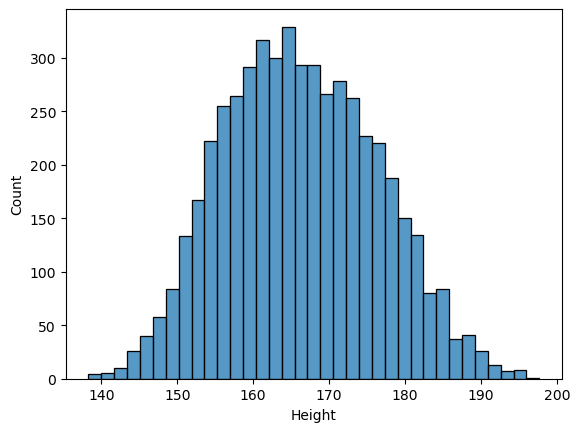

In [39]:
sns.histplot(x="Height", data=df)

<Axes: xlabel='Height-z', ylabel='Count'>

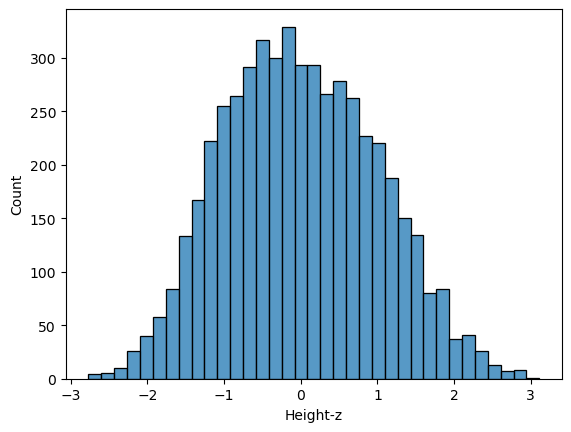

In [37]:
sns.histplot(x="Height-z", data=df)

Nice properties of $z$-scores:
  - $\hat{x}_i < 0$, smaller than average
  - $\hat{x}_i > 0$, greater than average
  - $\hat{x}_i > 1$, more than one standard deviation above average
  - etc.
  - Can give context to how normal or anomalous a datapoint is

## 0-1 normalization
$$ \hat{x}_i = \frac{x_i - x_{min}}{x_{max}-x_{min}}$$
  - Here $x_{max}$ and $x_{min}$ are the max/min values observed in the dataset -- ***or*** a theoretical min or max.
  - Warning: if a new datapoint comes along and you use the same mapping, can get values that are $<0$ or $>1$.
  - We did this with images!

## Exponentiation
If we need to to make values non-negative, can exponentiate:
$$ \hat{x}_i = e^{x_i}$$
  - $x_i \to -\infty$, normalized value approaches 0
  - $x_i \to \infty$, normalized value gets large quickly!

<Axes: >

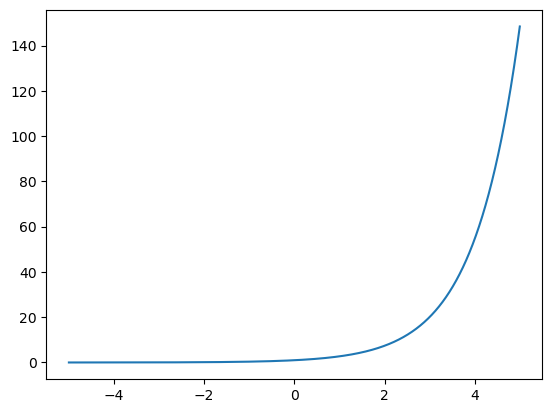

In [40]:
x = np.linspace(-5,5,num=10000)

sns.lineplot(x=x, y = np.exp(x))